# Exploratory Data Analysis on Kaggle Lung Cancer Dataset.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv("./survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

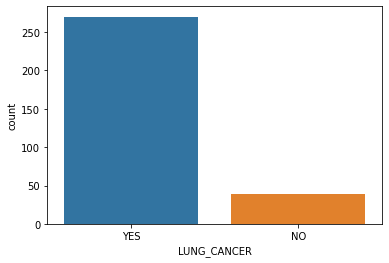

In [4]:
sns.countplot(x ='LUNG_CANCER', data = df)

## Insight 1: Dataset is highly imbalanced, with a skewed distribution in lung cancer/ no lung cancer categories.

In [5]:
# Replace multiple values at once
df['SMOKING'].replace({2: "YES", 1:"NO" }, inplace=True)
df['LUNG_CANCER'].replace({2: "YES", 1:"NO" }, inplace=True)
df.rename(columns = {'ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING'}, inplace = True)
df['ALCOHOL_CONSUMING'].replace({2: "YES", 1:"NO" }, inplace=True)

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,2,2,1,1,2,1,2,YES,2,2,2,2,YES
1,M,74,YES,1,1,1,2,2,2,1,NO,1,2,2,2,YES
2,F,59,NO,1,1,2,1,2,1,2,NO,2,2,1,2,NO
3,M,63,YES,2,2,1,1,1,1,1,YES,1,1,2,2,NO
4,F,63,NO,2,1,1,1,1,1,2,NO,2,2,1,1,NO


In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Insight 2: The dataset has no null (missing) values, ensuring completeness and reliability of the data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<AxesSubplot:xlabel='GENDER', ylabel='count'>

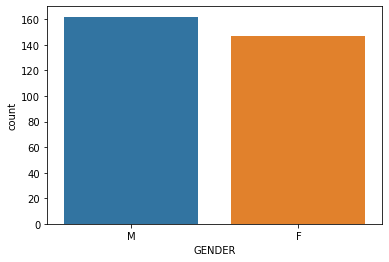

In [8]:
sns.countplot( x= "GENDER", data = df)

In [9]:
percentage_of_males = df['GENDER'].value_counts()['M']/ (df['GENDER'].value_counts()['M'] + df['GENDER'].value_counts()['F'])
percentage_of_males

0.5242718446601942

In [10]:
percentage_of_females = df['GENDER'].value_counts()['F']/ (df['GENDER'].value_counts()['M'] + df['GENDER'].value_counts()['F'])
percentage_of_females

0.47572815533980584

## Insight 3: There is a slightly higher proportion of males (52.4%) compared to females (47.6%) in the dataset.

In [11]:
df['AGE'].mean()

62.67313915857605

In [12]:
df['AGE'].median()

62.0

## Insight 4: The mean and median ages are nearly identical (Mean: 62.67 years, Median: 62 years), indicating a normal distribution of the 'Age' column

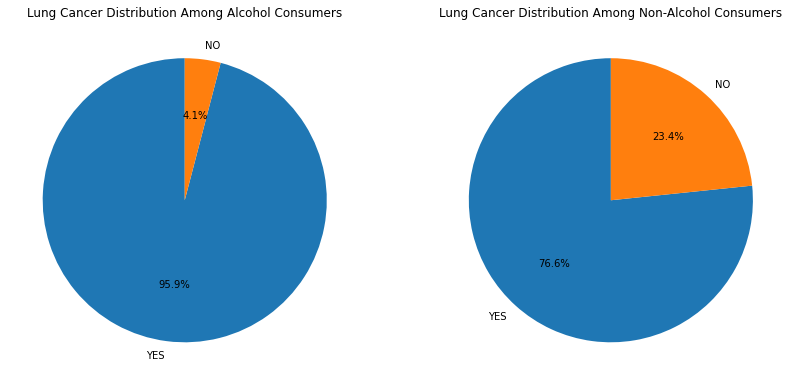

In [13]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Aggregating data for Alcohol Consumers and Non-Consumers
alcohol_consumers = df[df['ALCOHOL_CONSUMING'] == 'YES']
non_alcohol_consumers = df[df['ALCOHOL_CONSUMING'] == 'NO']

# Distribution of Lung Cancer among Alcohol Consumers
alcohol_consumers_counts = alcohol_consumers['LUNG_CANCER'].value_counts()
axs[0].pie(alcohol_consumers_counts, labels=alcohol_consumers_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Lung Cancer Distribution Among Alcohol Consumers')

# Distribution of Lung Cancer among Non-Alcohol Consumers
non_alcohol_consumers_counts = non_alcohol_consumers['LUNG_CANCER'].value_counts()
axs[1].pie(non_alcohol_consumers_counts, labels=non_alcohol_consumers_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Lung Cancer Distribution Among Non-Alcohol Consumers')

# Display the pie charts
plt.show()

## Insight 5: Alcoholics are 19.3% more prone to lung cancer compared to non-alcoholics

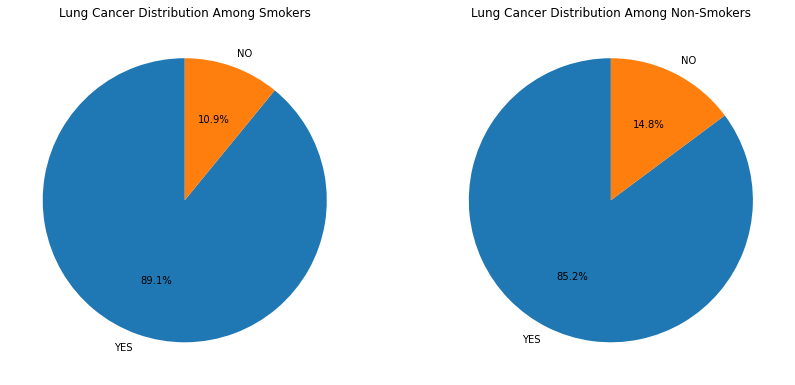

In [14]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Filtering data for smokers and non-smokers
smokers = df[df['SMOKING'] == "YES"]
non_smokers = df[df['SMOKING'] == "NO"]

# Distribution of Lung Cancer among smokers
smoker_counts = smokers['LUNG_CANCER'].value_counts()
axs[0].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Lung Cancer Distribution Among Smokers')

# Distribution of Lung Cancer among non-smokers
non_smoker_counts = non_smokers['LUNG_CANCER'].value_counts()
axs[1].pie(non_smoker_counts, labels=non_smoker_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Lung Cancer Distribution Among Non-Smokers')

# Display the pie charts
plt.show()

## Insight 6: Smokers are 3.9% more prone to lung cancer compared to non-smokers 

<AxesSubplot:xlabel='AGE'>

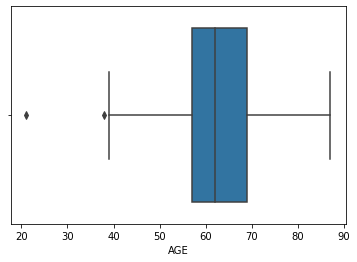

In [15]:
sns.boxplot(x ='AGE', data=df)

## Insight 7: The 'Age' column has a negligible amount of outliers, confirming its normal distribution.

C:\Users\91999\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

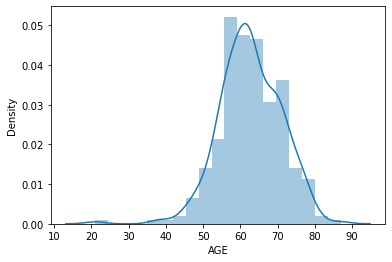

In [16]:
sns.distplot(a = df['AGE'])

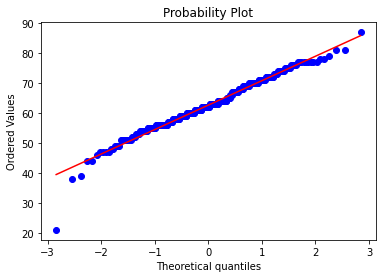

In [17]:
import scipy.stats as stats
stats.probplot(df['AGE'], dist="norm", plot=plt)
plt.show()

## Insight 8: Based on the Histogram (with KDE) plot and QQ plot, the 'Age' column follows a normal distribution.

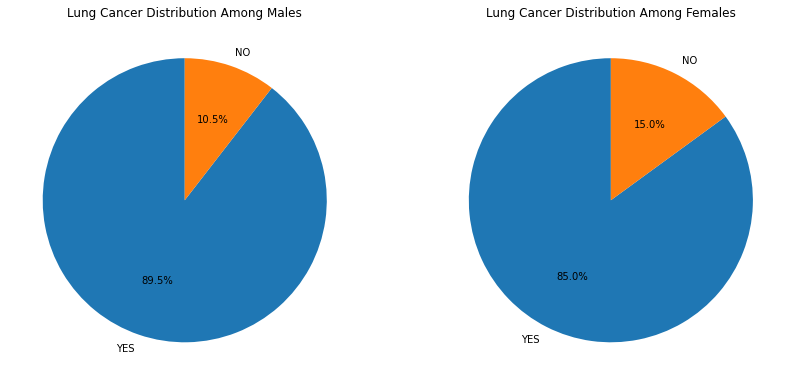

In [18]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Filtering data for males and females
males = df[df['GENDER'] == 'M']
females = df[df['GENDER'] == 'F']

# Distribution of Lung Cancer among males
male_counts = males['LUNG_CANCER'].value_counts()
axs[0].pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Lung Cancer Distribution Among Males')

# Distribution of Lung Cancer among females
female_counts = females['LUNG_CANCER'].value_counts()
axs[1].pie(female_counts, labels=female_counts.index, autopct='%1.1f%%', startangle=90, )
axs[1].set_title('Lung Cancer Distribution Among Females')

# Display the pie charts
plt.show()

## Insight 9: The proportion of male individuals with lung cancer is 4.5% higher than that of females.

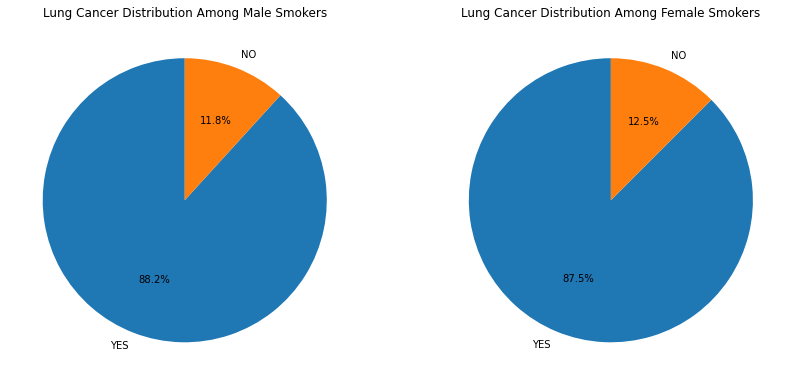

In [19]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Filtering data for male smokers and male non-smokers
male_smokers = df[(df['GENDER'] == 'M') & (df['SMOKING'] == 'NO')]
female_smokers = df[(df['GENDER'] == 'F') & (df['SMOKING'] == 'YES')]

# Distribution of Lung Cancer among male smokers
male_smoker_counts = male_smokers['LUNG_CANCER'].value_counts()
axs[0].pie(male_smoker_counts, labels=male_smoker_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Lung Cancer Distribution Among Male Smokers')

# Distribution of Lung Cancer among female smokers
female_smoker_counts = female_smokers['LUNG_CANCER'].value_counts()
axs[1].pie(female_smoker_counts, labels=female_smoker_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Lung Cancer Distribution Among Female Smokers')

# Display the pie charts
plt.show()

## Insight 10: Male and female smokers are equally prone to lung cancer.

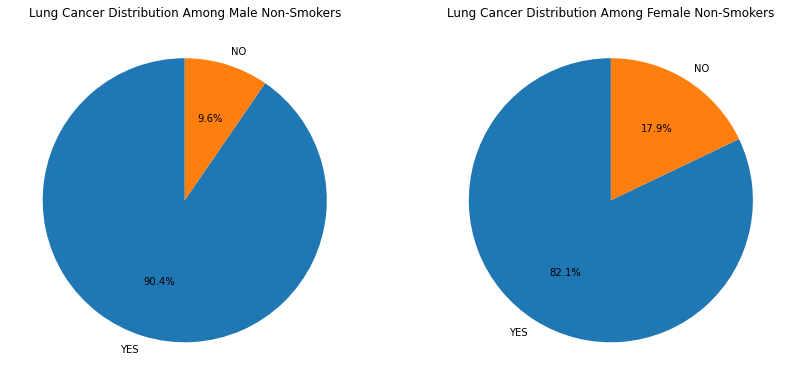

In [20]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Filtering data for female smokers and female non-smokers
male_non_smokers = df[(df['GENDER'] == 'M') & (df['SMOKING'] == 'YES')]
female_non_smokers = df[(df['GENDER'] == 'F') & (df['SMOKING'] == 'NO')]

# Distribution of Lung Cancer among male non-smokers
male_non_smoker_counts = male_non_smokers['LUNG_CANCER'].value_counts()
axs[0].pie(male_non_smoker_counts, labels=male_non_smoker_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Lung Cancer Distribution Among Male Non-Smokers')

# Distribution of Lung Cancer among female non-smokers
female_non_smoker_counts = female_non_smokers['LUNG_CANCER'].value_counts()
axs[1].pie(female_non_smoker_counts, labels=female_non_smoker_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Lung Cancer Distribution Among Female Non-Smokers')

# Display the pie charts
plt.show()

## Insight 11: Female non-smokers are 8.3% more prone to lung cancer compared to male non-smokers.

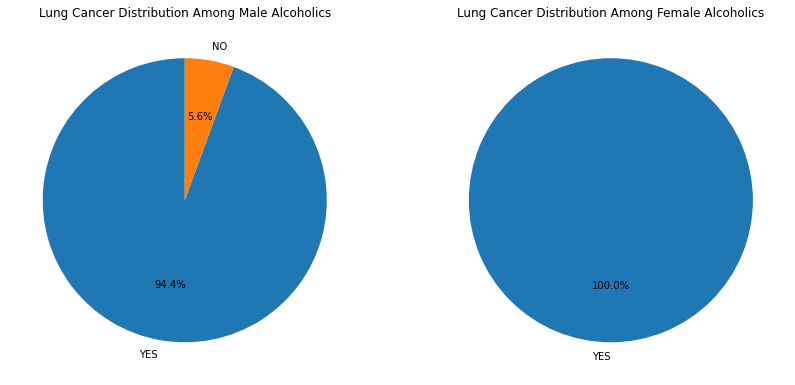

In [21]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Filtering data for male alcoholics and male non-alcoholics
female_alcoholics = df[(df['GENDER'] == 'F') & (df['ALCOHOL_CONSUMING'] == 'YES')]
male_alcoholics = df[(df['GENDER'] == 'M') & (df['ALCOHOL_CONSUMING'] == 'YES')]

# Distribution of Lung Cancer among male alcoholics
male_alcoholic_counts = male_alcoholics['LUNG_CANCER'].value_counts()
axs[0].pie(male_alcoholic_counts, labels=male_alcoholic_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Lung Cancer Distribution Among Male Alcoholics')

# Distribution of Lung Cancer among female alcoholics
female_alcoholic_counts = female_alcoholics['LUNG_CANCER'].value_counts()
axs[1].pie(female_alcoholic_counts, labels=female_alcoholic_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Lung Cancer Distribution Among Female Alcoholics')

# Display the pie charts
plt.show()

## Insight 12:  Female alcoholics are 5.6% more prone to lung cancer compared to male alcoholics.

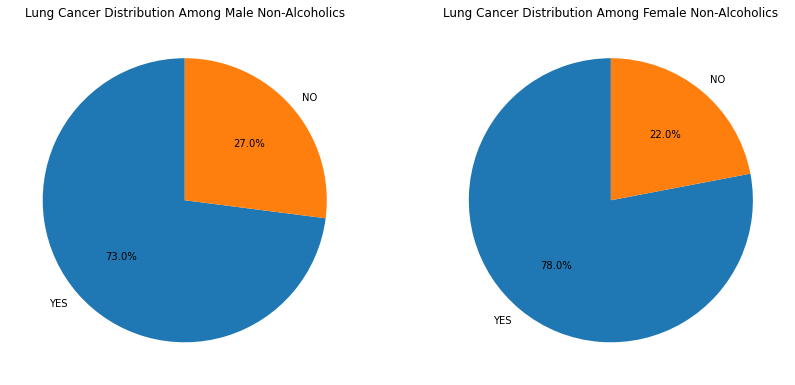

In [22]:
# Setting up the figure with 2 subplots horizontally
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Filtering data for female alcoholics and female non-alcoholics
male_non_alcoholics = df[(df['GENDER'] == 'M') & (df['ALCOHOL_CONSUMING'] == 'NO')]
female_non_alcoholics = df[(df['GENDER'] == 'F') & (df['ALCOHOL_CONSUMING'] == 'NO')]

# Distribution of Lung Cancer among male non-alcoholics
male_non_alcoholic_counts = male_non_alcoholics['LUNG_CANCER'].value_counts()
axs[0].pie(male_non_alcoholic_counts, labels=male_non_alcoholic_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Lung Cancer Distribution Among Male Non-Alcoholics')

# Distribution of Lung Cancer among female non-alcoholics
female_non_alcoholic_counts = female_non_alcoholics['LUNG_CANCER'].value_counts()
axs[1].pie(female_non_alcoholic_counts, labels=female_non_alcoholic_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Lung Cancer Distribution Among Female Non-Alcoholics')

# Display the pie charts
plt.show()

## Insight 13: Male non-alcoholics are 5% less prone to lung cancer compared to female non-alcoholics.

# Summary:
### Insight 1: The dataset is highly imbalanced, with a skewed distribution in lung cancer/ no lung cancer categories.
### Insight 2: The dataset has no null (missing) values, ensuring completeness and reliability of the data.
### Insight 3: There is a slightly higher proportion of males (52.4%) compared to females (47.6%) in the dataset.
### Insight 4: The mean and median ages are nearly identical (Mean: 62.67 years, Median: 62 years), indicating a normal distribution of the 'Age' column.
### Insight 5: Alcoholics are 19.3% more prone to lung cancer compared to non-alcoholics.
### Insight 6: Smokers are 3.9% more prone to lung cancer compared to non-smokers.
### Insight 7: The 'Age' column has a negligible amount of outliers, confirming its normal distribution.
### Insight 8: Based on the Histogram (with KDE) plot and QQ plot, the 'Age' column follows a normal distribution.
### Insight 9: The proportion of male individuals with lung cancer is 4.5% higher than that of females.
### Insight 10: Male and female smokers are equally prone to lung cancer.
### Insight 11: Female non-smokers are 8.3% more prone to lung cancer compared to male non-smokers.
### Insight 12: Female alcoholics are 5.6% more prone to lung cancer compared to male alcoholics.
### Insight 13: Male non-alcoholics are 5% less prone to lung cancer compared to female non-alcoholics.